# Import packages to parse results

In [19]:
# !pip install researchpy
# import researchpy as rp

In [20]:
from glob import glob
from tabulate import tabulate
from IPython.display import HTML
import pandas as pd
import json

import plotly.graph_objects as go
import scipy.stats as stats
import import_ipynb
from shared_notebook import create_dataframe

### Set default color palete and size for making plots

In [21]:
%store -r colorPallet
%store -r bgColor
%store -r baseFigureWidth
%store -r baseFigureHeight

## Log file locations relative to notebook

### For SEBS, we have 3 different clusters, 4 methods, multiple concurrent calls

In [22]:
# kOps clusters (running on AWS)
# AWS EKS cluster
clusters={
    'kOps 8x 8vCPU 16Gb': 'kops-multi-tenant-spot-1x-72vcpu-144gb',
    'kOps 1x 72vCPU 144Gb': 'kops-multi-tenant-spot-8x-8vcpu-16gb',
    'EKS 8x 8vCPU 16Gb': 'eks-multi-tenant-spot-8x-8vcpu-16gb'
}
methods=('dna', 'bfs', 'mst', 'pagerank')
headers=list(methods)
headers.insert(0, 'concurrent calls')
concurrent_calls=(32, 64, 96, 128)

sebs_df=dict()
for k, v in clusters.items():
    sebs_df[k]=dict()
    for m in methods:
        sebs_df[k][m]=dict()
        for c in concurrent_calls:
            sebs_df[k][m][c]=create_dataframe(f"../logs/openfaas/{v}/sebs/concurrent/{c}/*{m}*")

# Using tabulate to create tables for results

In [23]:
# Mean runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            mean_runtime=sebs_df[k][m][value]['runtime'].mean()
            data[count].append(mean_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>Mean runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,dna,bfs,mst,pagerank
32,17963.8,103.406,111.438,187.594
64,17981.7,99.1406,97.8281,188.156
96,18428.1,101.917,102.031,196.583
128,18391.3,202.641,104.461,193.922


concurrent calls,dna,bfs,mst,pagerank
32,15305.1,103.219,46.125,71.8125
64,16341.9,73.0938,66.8594,112.203
96,17440.9,519.125,67.625,109.646
128,16609.9,590.336,65.1562,121.336


concurrent calls,dna,bfs,mst,pagerank
32,14422,60.5312,44.0625,76.875
64,26451.8,65.8281,58.2031,108.172
96,27660.8,65.75,63.3854,119.812
128,24955.7,85.7734,58.4141,114.242


In [24]:
# Standard runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            std_runtime=sebs_df[k][m][value]['runtime'].std()
            data[count].append(std_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>Std runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,dna,bfs,mst,pagerank
32,3637.96,27.9191,53.9994,44.3439
64,3839.43,20.7333,18.6152,50.138
96,2754.6,20.6574,19.3453,47.682
128,3205.99,556.341,25.2954,43.8406


concurrent calls,dna,bfs,mst,pagerank
32,4344.08,48.1983,25.0068,32.7596
64,3751.07,27.7086,28.1796,44.2623
96,5636.45,1359.25,35.6324,43.9483
128,3360.26,1224.76,27.4557,44.7135


concurrent calls,dna,bfs,mst,pagerank
32,3989.87,26.2543,24.1219,45.8643
64,9404.79,28.9929,25.7103,43.132
96,18232.6,28.1253,30.9741,41.8497
128,16846.1,29.6391,28.7557,44.1686


In [25]:
# CV runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            mean_runtime=sebs_df[k][m][value]['runtime'].mean()
            std_runtime=sebs_df[k][m][value]['runtime'].std()
            cv_runtime=std_runtime/mean_runtime
            data[count].append(cv_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>CV runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,dna,bfs,mst,pagerank
32,0.202516,0.269994,0.484571,0.236382
64,0.213519,0.20913,0.190285,0.26647
96,0.149478,0.20269,0.189602,0.242554
128,0.174321,2.74546,0.242152,0.226073


concurrent calls,dna,bfs,mst,pagerank
32,0.283833,0.466953,0.542152,0.456182
64,0.229537,0.379084,0.421476,0.394483
96,0.323174,2.61834,0.526912,0.40082
128,0.202305,2.07469,0.421383,0.36851


concurrent calls,dna,bfs,mst,pagerank
32,0.276652,0.433732,0.547448,0.596609
64,0.355544,0.440434,0.441735,0.398736
96,0.65915,0.427761,0.488663,0.349293
128,0.675039,0.345551,0.492274,0.386622


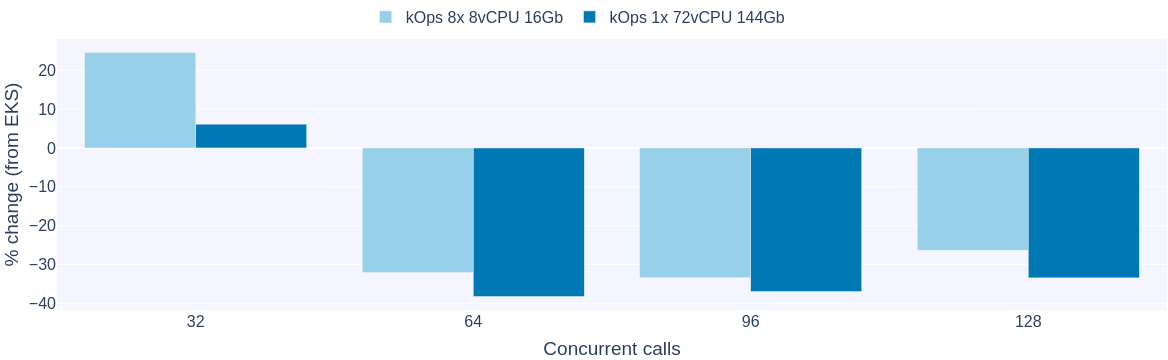

In [26]:
# fig = make_subplots(specs = [[{"secondary_y": False}]])
fig = go.Figure()

# Add figure title
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        t=0,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='% change (from EKS)',
    plot_bgcolor=bgColor
)

data=[]
for i, k in enumerate(list(clusters.keys())[:-1], start=0):
    y_data=[]
    for c in concurrent_calls:
        kops_mean=sebs_df[k]['dna'][c]['runtime'].mean()
        eks_mean=sebs_df['EKS 8x 8vCPU 16Gb']['dna'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
    fig.add_trace(go.Bar(name=k, x=concurrent_calls, y=y_data, marker_color=colorPallet[i]))

fig.show()

In [27]:
# summary, results = rp.ttest(group1= sebs_df['kOps 8x 8vCPU 16Gb']['dna'][32]['runtime'], group1_name= "kOps",
#          group2= sebs_df['EKS 8x 8vCPU 16Gb']['dna'][32]['runtime'], group2_name= "EKS")
# print(results)
# print(summary)

stats.ttest_ind(sebs_df['kOps 8x 8vCPU 16Gb']['dna'][32]['runtime'], sebs_df['EKS 8x 8vCPU 16Gb']['dna'][32]['runtime'])

Ttest_indResult(statistic=3.710673887916968, pvalue=0.00044423757429873503)